In [1]:
!pip install tensorflow

In [2]:
!pip install intel-tensorflow

In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr     #to tell type oof image
from matplotlib import pyplot as plt

C:\Users\arees\AppData\Local\Temp\ipykernel_11892\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
cpus = tf.config.experimental.list_physical_devices('CPU')     #yeh list krta physical CPUs available in your system using TensorFlow, you can use tf.config.experimental.list_physical_devices('CPU').
len(cpus)     #num of physical cpu

1

In [23]:
from tensorflow.keras.preprocessing import image

In [ ]:
#Conv2D is a 2-dimensional convolutional layer used in convolutional neural networks to process spatial data, such as images, by applying convolutional filters
#MaxPooling2D is a downsampling layer in convolutional neural networks that reduces the spatial dimensions 
#A Flatten layer in a neural network transforms a multi-dimensional tensor (e.g., the output of a convolutional or pooling layer) into a one-dimensional tensor. This is often used to prepare the data for fully connected (dense) layers,
#A Dense layer, also known as a fully connected layer, is a neural network layer where each neuron is connected to every neuron in the previous layer. It performs a linear transformation
#A Dropout layer is a regularization technique used in neural networks to prevent overfitting. convert some input to zero so new data predicts well
#Batch normalization is a technique used in neural networks to improve training speed, stability, and performance.
#Lambda layer is used to pass an input tensor through this layer to get the scaled output.

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns     #A statistical data visualization library based on Matplotlib, useful for making plots.
import keras     #A deep learning API, part of TensorFlow, used to build and train neural networks.
from PIL import Image     #(Python Imaging Library): Used for opening, manipulating, and saving many different image file formats.
from keras.preprocessing import image     
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator     #The ImageDataGenerator class in TensorFlow's Keras API is a powerful tool for data augmentation, preprocessing
from keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers     # Regularization helps prevent neural networks from fitting the training data too closely and improves their generalization performance on unseen data.
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax     #methods used to update the parameters (weights and biases) of the model during training in order to minimize the loss function

In [8]:
train_dir = r'C:\Users\arees\OneDrive\Desktop\LabCVProject\DATASET\TRAIN' #directory with training images
test_dir = r'C:\Users\arees\OneDrive\Desktop\LabCVProject\DATASET\TEST' #directory with testing images

In [9]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,     #hifting images horizontally.
                                  horizontal_flip = True,     #helps increase the diversity of training data by creating mirror images, which can improve the model's ability to generalize.
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [10]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),     #size to which all images will be resized.
                                                    color_mode = 'rgb',     #coverted to rgb 
                                                    class_mode = 'categorical',     
                                                    batch_size = 16,     #specifies the size of the batches of data that will be generated during training.
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [11]:
model = Sequential([
     Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),     #64 filters, each with a 3x3 kernel size. The activation function is ReLU (activation='relu'), and the padding is set to 'same', meaning the output has the same spatial dimensions as the input.
    MaxPooling2D(2, 2),
    Dropout(0.25),    
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),     # dropout rate of 25%. Dropout randomly sets a fraction of input units to zero during training to prevent overfitting
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu'),     #fully connected layer (Dense) with 1024 neurons and ReLU activation function.
    Dropout(0.5),
    Dense(5, activation='softmax')     #output layer with 5 neurons and softmax activation function.
])

C:\Users\arees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 16     # size of each mini-batch of data that the model processes at each training step.

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   205,521,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,897,861 (785.44 MB)

 Trainable params: 205,897,861 (785.44 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from PIL import ImageFile     # module within PIL that provides support for handling various image file formats.
ImageFile.LOAD_TRUNCATED_IMAGES = True     #attempt to load images even if they are truncated or corrupted. When set to True, PIL will attempt to load truncated images without raising an error.

In [15]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50


C:\Users\arees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/55 ━━━━━━━━━━━━━━━━━━━━ 3:01 3s/step - accuracy: 0.1562 - loss: 35.0805

C:\Users\arees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.2102 - loss: 11.9709 - val_accuracy: 0.3261 - val_loss: 1.5983
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.2747 - loss: 1.6058 - val_accuracy: 0.2717 - val_loss: 1.5872
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.2724 - loss: 1.5875 - val_accuracy: 0.3587 - val_loss: 1.5170
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.2630 - loss: 1.5705 - val_accuracy: 0.3804 - val_loss: 1.5173
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.3324 - loss: 1.5250 - val_accuracy: 0.5217 - val_loss: 1.2595
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.4655 - loss: 1.3837 - val_accuracy: 0.6304 - val_loss: 1.0050
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.5266 - loss: 1.2015 - val_accuracy: 0.7174 - val_loss: 0.7688
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5618 - loss: 1.1773 - val_accuracy: 0.7174 - val_loss: 0

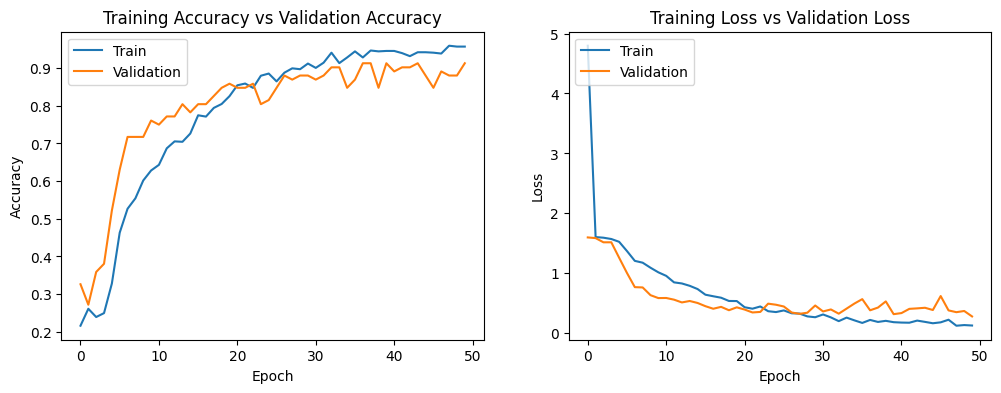

In [16]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

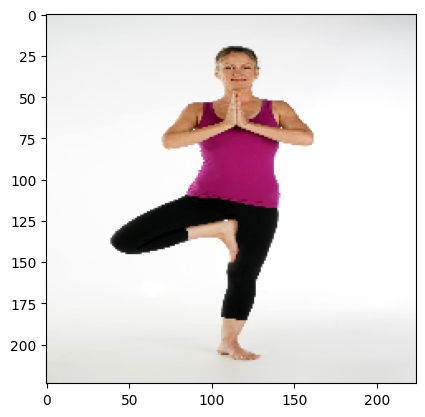

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
The predicted yoga pose is: tree


In [18]:
img_path = r'C:\Users\arees\OneDrive\Desktop\LabCVProject\DATASET\TEST\tree\00000001.jpg'  
img = image.load_img(img_path, target_size=(224, 224))  # Target size should match the input size of your model
plt.imshow(img)
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Interpret the predictions
class_labels = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']  
predicted_class = np.argmax(predictions[0])
predicted_label = class_labels[predicted_class]

print(f'The predicted yoga pose is: {predicted_label}')

In [21]:
import h5py
model_path = '/content/drive/MyDrive/DATASET/yogaPoses.h5'

# Save the model
model.save(model_path)
with h5py.File(model_path, 'a') as f:
    f.attrs['tensorflow_version'] = tf.__version__
    f.attrs['keras_version'] = tf.keras.__version__

print("Model saved")

Model saved with TensorFlow and Keras version information.
